# **Question 1 : Visualizing Pleiades cluster**

Our beloved astronomy club, Krittika, is named after one of the most conspicuous star cluster in the sky, Pleiades. The CSV file stardata.csv
contains four columns of data, which contain the following data for 196 stars in the cluster:


*   Column 1: RA of each star in degrees
*   Column 2: Declination of each star in degrees
*   Column 3: Parallax of each star in milliarcseconds (mas)
*   Column 4: Apparent Magnitude of the star


Parallax $p$ of a star is directly related to its distance $d$ as $d$ in parsecs $= \frac{1}{p}$ where parallax is in arcseconds.

Before proceeding, you need to be able to read the csv file contents, and since the assignment involves graphs, you might want to import some things as well:

In [15]:
##Lets, first import the required libraries and load the csv file.

from numpy import*
from matplotlib.pyplot import*
%matplotlib inline
import pandas as pd
StarData=pd.read_csv("stardata.csv",header=None)

A little background on magnitude of a star:

Magnitudes in Astronomy are a way to describe how bright an object (in our case, a star) is:

**Apparent magnitude**: Apparent magnitude ($m$) is a measure of the brightness of a star or any other astronomical object observed from the earth. It is similar to the decibel system for sound in that magnitudes are logarithmic and can be calculated according to the formula
$$m = -2.5 \log  { \left ( \dfrac{F}{F_0} \right )} $$
where $F$ is the flux from the star (measured in $W/m^2$), and $F_0$ is a reference flux. 

We can calculate the flux of a star at some distance $d$ away as
$$F = \dfrac{L}{4 \pi d^2}$$

where $L$ is the Luminosity of the star (measured in W).

**Absolute magnitude**: It is the magnitude of the star at a distance of 10 pc, and is related to the apparent magnitude by (and try to see if you can derive this):
$$m-M = -5 + 5\log_{10}(d)$$
where $M$ is the absolute magnitude and $d$ is the distance of the star from us in parsecs (pc).
To read up more about magnitudes, hit up this Wikipedia article - https://en.wikipedia.org/wiki/Magnitude_(astronomy%29.

Using the above info and the earlier relation of distance and parallax, use the imported libraries to find the absolute magnitudes of all the stars of the csv file, and plot a histogram of the distribution, with 50 bins.

In [16]:
StarData.head()

,0,1,2,3
0,56.566774,24.189735,7.393535,8.208464
1,56.557355,24.196560,7.545835,7.323018
2,56.613757,24.254807,7.217771,7.339084
3,56.642808,24.138091,3.511365,11.468399
4,56.663986,24.103001,7.418397,9.191837


In [17]:
##Renaming the columns in the appropiate way as described in the question

StarData.columns=['RA','Declination','Parallax','App.Magnitude']

In [18]:
StarData.head()

,RA,Declination,Parallax,App.Magnitude
0,56.566774,24.189735,7.393535,8.208464
1,56.557355,24.196560,7.545835,7.323018
2,56.613757,24.254807,7.217771,7.339084
3,56.642808,24.138091,3.511365,11.468399
4,56.663986,24.103001,7.418397,9.191837


In [19]:
StarData.dropna().reset_index()

,index,RA,Declination,Parallax,App.Magnitude
0,0,56.566774,24.189735,7.393535,8.208464
1,1,56.557355,24.196560,7.545835,7.323018
2,2,56.613757,24.254807,7.217771,7.339084
3,3,56.642808,24.138091,3.511365,11.468399
4,4,56.663986,24.103001,7.418397,9.191837
...,...,...,...,...,...
191,195,56.085556,24.772663,7.184981,10.851324
192,196,57.413389,24.227447,0.731824,11.703114
193,197,57.275547,23.781044,7.209080,10.420579
194,198,56.352150,23.486739,3.247452,11.549389


In [107]:
## Storing Data in the Arrays of their corresponding Columns at once, so that it will be easy to access

Apparent_Magnitude = StarData['App.Magnitude'].to_numpy()

Parallax= StarData['Parallax'].to_numpy()

Distance=1000/Parallax

RA=StarData['RA'].to_numpy()

Declination=StarData['Declination'].to_numpy()

(array([ 1.,  1.,  1.,  0.,  2.,  3.,  1.,  3.,  0.,  2.,  1.,  4.,  2.,
         5.,  4.,  3.,  1.,  1.,  3., 11.,  5.,  9.,  3.,  1.,  5.,  3.,
         6.,  4.,  7.,  7.,  4.,  2.,  9.,  4.,  4.,  8.,  4.,  8.,  4.,
         3., 11.,  5.,  6.,  5.,  1.,  6.,  3.,  2.,  3.,  5.]),
 array([-2.71998553, -2.53965415, -2.35932276, -2.17899138, -1.99866   ,
        -1.81832862, -1.63799724, -1.45766586, -1.27733448, -1.0970031 ,
        -0.91667172, -0.73634034, -0.55600896, -0.37567758, -0.1953462 ,
        -0.01501482,  0.16531656,  0.34564794,  0.52597932,  0.70631071,
         0.88664209,  1.06697347,  1.24730485,  1.42763623,  1.60796761,
         1.78829899,  1.96863037,  2.14896175,  2.32929313,  2.50962451,
         2.68995589,  2.87028727,  3.05061865,  3.23095003,  3.41128141,
         3.59161279,  3.77194418,  3.95227556,  4.13260694,  4.31293832,
         4.4932697 ,  4.67360108,  4.85393246,  5.03426384,  5.21459522,
         5.3949266 ,  5.57525798,  5.75558936,  5.93592074,

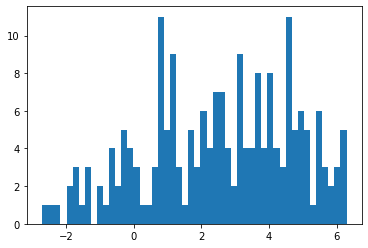

In [108]:
## Operations on arrays are elementwise.Hence, we can directly write the Absolute Magnitude in the following form 

Absolute_Magnitude= Apparent_Magnitude + 5 - 5*log10(Distance)

## Now, Plotting the Data in the form of Histogram

hist(Absolute_Magnitude,bins=50)


A good way to visualize the actual star cluster as it appears to us in the night sky would be to make a scatter plot of declination and RA on the $y$ and $x$ axes respectively. Try plotting the stars such that the star appears bigger if it is brighter. One way to do this is to make the size of dots in scatter plot proportional to (12 - apparent magnitude) of the star.

(Hint: Google how to make a scatter plot with variable size of dots.)

If you can't make a plot with variable dot sizes, make a simple plot with all dots of same size.

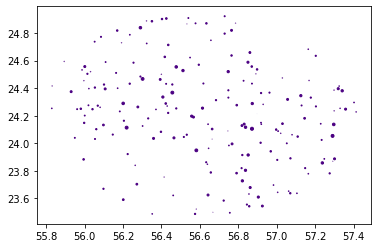

In [109]:
#Solution code

#For varying dot sizes we take the size of dots as a function of the Apparent Magnitude

s=12-Apparent_Magnitude

scatter(RA,Declination,s=s,color='indigo')

# **Question 2 : Estimating Age of Universe using Hubble's Law**

In this problem, we will use Hubble's Law on a large number of galaxies, and fit the data to a linear model to find the value of the Hubble Constant, which we will use to calculate the current age of the universe.

You can learn more about Hubble's Law, a very important principle of cosmology and expansion of Universe over here - https://simple.m.wikipedia.org/wiki/Hubble%27s_law 

Step 0: Importing libraries

Dump all the required libraries, and define any necessary constants in the code box below.

You will require the optimize module of scipy library, so be sure to include a line saying `from scipy.optimize import curve_fit`.

In [41]:
from scipy.optimize import curve_fit as cf

Step 2: Loading the data

Open the file "data.txt" and store it in array(s). First row contains the distance modulus (https://en.m.wikipedia.org/wiki/Distance_modulus) of the galaxy from earth, second row contains the line of sight velocity in km/s.

To convert distance modulus to distance in Megaparsecs (the unit we will be using in the rest of the question), use the formula:

$d = 10^{\left(\frac{d_{dist mod}}{5} - 5\right)}$

where $d$ is in megaparsecs (Mpc).

In [42]:
## Loading the csv file

Data=pd.read_csv("data.txt")
Data.head()

,mod0,vgsr
0,36.65,15080
1,37.29,18221
2,33.75,3129
3,32.66,4486
4,33.37,4564


Step 3: Preliminary Data Visualization

Create a function taking the distance to the galaxy, and a slope and an intercept parameter as input, returning recession velocity of that galaxy as output. A code snippet showing how to use curve_fit to find the optimum slope and intercept is shown here - https://github.com/krittikaiitb/tutorials/blob/master/Tutorial_07/SciPy1.ipynb 

Create a scatter plot of the line of sight velocity of the galaxies (in km/s) vs the distance to the galaxies (in Mpc). Also plot the model you just fit in the same graph.

In [101]:
## Storing the Data in the corresponding arrays for easy access

dis_mod=Data['mod0'].to_numpy()

velocity=Data['vgsr'].to_numpy()

dis=10**((dis_mod/5)-5)

#The above relation can we written in the following form due to element wise operations in an array

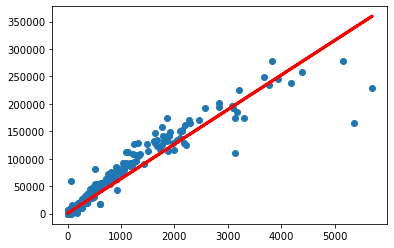

In [115]:
## As mentioned we first define Best_fit function as the following

def Best_fit(d,m,c):
    return m*d+c

## Using curve_fit so that we can get the solution of optimal variables

P,M = cf(Best_fit,dis,velocity)

## P=array[Slope,Interpect] 
##Plotting scatter and Slope*dis + Intercept

scatter(dis,velocity)
Line=P[0]*dis+P[1] 

plot(dis,Line,'r',linewidth=3)

Step 4: Removing Outliers (OPTIONAL)

As you can see, there are many points on the outskirts of the graph, which may affect out calulations of the slope and intercept unduly. Devise a way to remove those outliers to your satisfaction, and replot the remaining data points. There are multiple ways to do this, a few of them could be:

1. Removing all points whose distances are 3$\times$(Standard Deviation of Distance from Earth) away from the Mean Distance of all input galaxies from Earth. (or take any factor other than 3)

2. Removing all points which are a certain distance away from the best fit line initially calculated (decide yourself what to set this distance as, could be a factor of the mean distance from the line for all points).

In [ ]:
##Lets first store the standard derviation and mean in the appropiate variables

Std_Dis=std(dis)
Mean_Dis=mean(dis)

#Defining the function "Remove_Outliers", which deletes the elements where the above condition is satisfied i;e dis-mean>3*std

def Remove_Outliers(std,mean,velo,dis):
    New_RemovedDis_Index=np.where(dis[:]-mean>3*std) ##Identifying the Index of removing elements
    
    New_Dis=np.delete(dis,New_RemovedDis_Index,axis=0)  ##Removing elements of correponding Index from both dis and velo
    
    New_Velo=np.delete(velo,New_RemovedDis_Index,axis=0)
    
    #Now that we got the required arrays ,plotting scatter and line graph(same way as in Best_fit)
    
    scatter(New_Dis,New_Velo)
    
    v,p_conv=cf(Best_fit,New_Dis,New_Velo)
    
    plot(New_Dis,v[0]*New_Dis+v[1],'r',linewidth=2.5)
    
    return

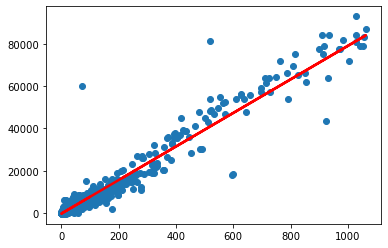

In [120]:
Remove_Outliers(Std_Dis,Mean_Dis,velocity,dis)

In [118]:
##Defining the function which Removes the elements satisfying the condition (distance>5*mean) and plots its corresponding scatter
## and regression line

def Remove_Points_Plot(dis,velo):
    P,M = cf(Best_fit,dis,velo)
    ##Optimized variables stored in P; P=[Slope,Intercept]
    
    Point_distance=abs(P[0]*dis-velo+P[1])/sqrt((P[0]**2)+1) ##Making an array of the distances from the line
    
    ##Finding Indices where the following condition is satisfied and deleting its corresponding elements from dis and velo
    
    Index=np.where(Point_distance[:]>5*mean(Point_distance)) 
    
    New_Dis=np.delete(dis,Index,axis=0)
    New_Velo=np.delete(velo,Index,axis=0)
    
    scatter(New_Dis,New_Velo)
    plot(New_Dis,P[0]*New_Dis+P[1],'r')
    
    return

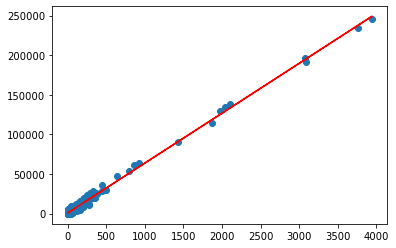

In [119]:
Remove_Points_Plot(dis,velocity)

Step 5: Conclusion

The slope of the graph (with recessional velocity in the y-axis and distance of the galaxy in the x-axis) gives us the Hubble Constant $H_0$ (in units km/s-Mpc). The reciprocal of the Hubble Constant is a good approximation for the age of the universe. Hence, find the age of the universe using your calculations.

In [106]:
## 1Mpac=3.26x10^6 light years, 1 light years=9.461x10^12 KM, 1 year= 3.154x10^7 sec.

##Hence converting the units of inverse of slope in years

##As mentioned earlier P=[Slope,Intercept], given that Ho is slope and Age=1/slope we write,

Age=(1/P[0])*(3.26*(10**6)*9.46*(10**12))/(3.154*(10**7))

Age

15524561141.637434

In [69]:
##That is approximately 15.5 billion years which is pretty close to the real one which is 13.8 billion years